In [325]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from category_encoders.ordinal import OrdinalEncoder
from sklearn.metrics import classification_report

In [326]:
train=pd.read_csv('data/train.csv')

In [327]:
print(train.head(10))
#train에 해당하는 데이터 정보를 간단하게 확인하여 본다.

   index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   
5      5      F   N       Y          2      270000.0               Working   
6      6      F   N       N          0      315000.0               Working   
7      7      M   N       Y          0      270000.0  Commercial associate   
8      8      M   Y       Y          1      180000.0  Commercial associate   
9      9      F   N       Y          0      103500.0               Working   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartmen

In [328]:
train.shape

(26457, 20)

# <center>train데이터 null값 확인하기</center>
<strong>train 데이터프레임</strong>에서 각 행 Column별로 Null값이 있는지 확인하여 보겠다.

In [329]:
train.isnull().sum()
# train  occyp_type 컬럼에서 결측치값 8171개 발견하였음. 
#8171개중 아무것도 없는 란에서 income_type이 연금수령자인 사람들이 아무것도 없는것을 확인.
#직업란을 연금수령자로 해야할것 같음.


index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

# <center>occyp_type 컬럼 NULL 값 채워주기.</center>
<strong>occyp_type</strong>컬럼의 NULL 값이 무려 8171개나 된다.<br/>
<strong>occyp_type</strong>이 NULL에 이루어진 데이터 프레임을 확인하여 보자.<br/>

In [330]:
print(train[train['occyp_type'].isnull()==True]['income_type'].value_counts())
print(train[train['occyp_type'].isnull()==True]['DAYS_EMPLOYED'].value_counts())

Pensioner               4440
Working                 2312
Commercial associate    1026
State servant            392
Student                    1
Name: income_type, dtype: int64
 365243    4438
-302         25
-1613        21
-3079        21
-2014        21
           ... 
-4276         1
-6198         1
-5382         1
-726          1
-473          1
Name: DAYS_EMPLOYED, Length: 963, dtype: int64


<strong>occyp_type</strong>의 <strong>Pensioner</strong>의 개수는 <strong>4440개</strong>, <br/>
<strong>DAYS_EMPLOYED</strong> 컬럼을 확인해본결과 <strong>365243</strong>은 일을 하지 않는 사람이므로, <br/>
<strong>Pensioner</strong>은 <strong>연금수령자</strong>이기 때문에, 은퇴 후 돈을 받으면서 일하지 않는 사람의 경우에<br/>
직업란에 값을 가지지 않는 것을 확인할  수 있다.<br/>
따라서, <strong>Pensioner </strong>에 속하면서 직업을 가지지 않는 <strong>4438개의 </strong> NULL값을 임의로 <br/>
<strong>occyp_type</strong>에 백수가 아닌 <strong>Pensioner</strong>로 별도로 값을 넣어주기로 하였다.<br/>

# <center>occyp_type가 Pensioner인 직업군 만들어주기</center>
<strong>imcome_type</strong>에서 <strong>Pensioner</strong>인 사람들이 직업을 가지지 않을 경우에 <br/>
은퇴 후, 일을 하지 않는것이며, 은퇴 후에도, 일을 하는 사람들은 <strong>occyp_type</strong>에 값이 들어 있을 것이다.<br/>
<strong>income_type이 Pensioner</strong>이며, <strong>occyp_type이 NULL</strong>인 조건식을 통하여<br/>
<strong> occyp_type</strong>에 <strong>Pensioner</strong>값을 넣을것이다.

In [331]:
train_p = train['income_type'] == 'Pensioner'
train_s = train['occyp_type'].isnull() == True
train.loc[(train_p & train_s), 'occyp_type']= "Pensioner"
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     22726 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<strong>occyp_type</strong>에 처음 존재한 <strong>NULL</strong>값은 처음에 <strong>8171개</strong>였다. <br/>
일을 완벽하게 하지 않아서, <strong>DAYS_EMPLOYED</strong>에서 <strong>365243</strong>값을 받은 숫자는 <strong>4438개</strong>이다.<br/>
<strong>4440개</strong>중에서 <strong>2개</strong>는 최근에 은퇴자가 된것인지?, 아니면, 직업을 새로 가졌지만, 직업란에 기입이 되지<br/>
않았을 가능성이 매우 크다. 이 2개의 직업마저도 <strong>Pensioner</strong>로 보기로 하였다.

In [332]:
print(train['occyp_type'].isnull().sum())

3731


# <center>income_type과 occyp_type에서 income_total이 영향을 끼치는가?</center>

<strong>income_type</strong>에서 종류가 다르더라도 <strong>occyp_type</strong>이 같은 경우가 있다.<br/>
<strong>occyp_type</strong>으로만 <strong>income_total</strong>을 봣을때와,<br/>
<strong>income_type</strong>별로 <strong>occyp_type</strong>을 비교하였을때의 <strong>income_total</strong>을 비교하겠다.

In [333]:
#income_type을 확인하여 본다.
train['occyp_type'].value_counts()

Laborers                 4512
Pensioner                4440
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

<strong>occyp_type</strong>에 해당하는 <strong>직업</strong>을 먼저 보여주고, <strong>income_type</strong>별 해당 직업<br/>
소득의 차이를 for문을 통해 전부다 확인하여 보겠다.<br/>

In [334]:
occyp_type_list=['Laborers', 'Pensioner', 'Core staff', 'Sales staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants '
                ,'Medicine staff','Cooking staff','Security staff','Cleaning staff','Private service staff ','Low-skill Laborers',
                'Waiters/barmen staff','Secretaries','Realty agents','HR staff','IT staff ']
income_type_list=['Pensioner','Working','Commercial associate','State servant','Student']
for i in occyp_type_list:
    print("{0}에 해당하는 정보입니다.".format(i))
    print(train[train['occyp_type']== i]['income_total'].describe())
    for j in income_type_list:
        print("income_type이 {0}일 경우의 {1} 입니다.".format(j,i))
        inc_type= train['income_type']== j
        oc_type= train['occyp_type']== i
        train_set=train[inc_type&oc_type]
        print(train_set['income_total'].describe())

Laborers에 해당하는 정보입니다.
count      4512.000000
mean     180307.189827
std       74596.477666
min       36000.000000
25%      135000.000000
50%      162000.000000
75%      225000.000000
max      900000.000000
Name: income_total, dtype: float64
income_type이 Pensioner일 경우의 Laborers 입니다.
count         3.000000
mean     240000.000000
std       56623.758265
min      180000.000000
25%      213750.000000
50%      247500.000000
75%      270000.000000
max      292500.000000
Name: income_total, dtype: float64
income_type이 Working일 경우의 Laborers 입니다.
count      3290.000000
mean     176236.204103
std       72482.539018
min       36000.000000
25%      130500.000000
50%      157500.000000
75%      225000.000000
max      900000.000000
Name: income_total, dtype: float64
income_type이 Commercial associate일 경우의 Laborers 입니다.
count      1075.00000
mean     190123.51814
std       76470.94113
min       67500.00000
25%      135000.00000
50%      180000.00000
75%      225000.00000
max      540000.00000
Name: inco

# <center>직업군의 income_total 확인하기</center>

<strong>직업</strong>이 과연 <strong>income_total</strong>에 관하여 <strong>income_type</strong>별로 차이를 가지는가?<br/>
<strong>Laborers</strong>하나를 예로 설명을 하겠다. <strong>Laborers</strong>을 기준으로, 전체적인 <strong>Laborers</strong>의 <strong>income_total</strong>평균을 보자.<br/>
<strong>income_type</strong>별로 <strong>Laborers</strong>의 <strong>income_total</strong>이 다른것을 알 수 있다.<br/>
따라서, 직업별로, <strong>income_total</strong>이 같다고 생각 할 수 없다. <strong>outlier</strong>를 제거하기 위해서는 <br/>
<strong>income_type</strong>별 <strong>occyp_type</strong>의 income_total</strong>을 확인 하여야 한다.<br/>

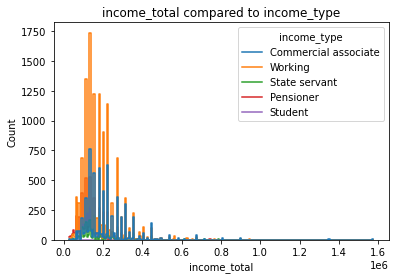

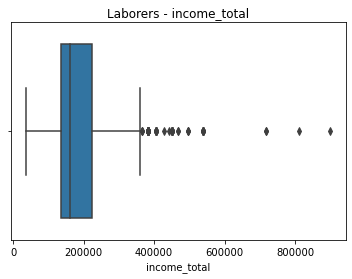

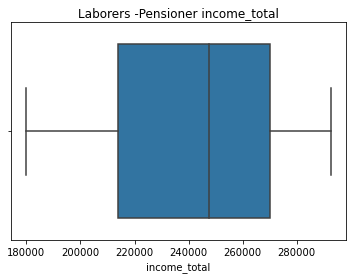

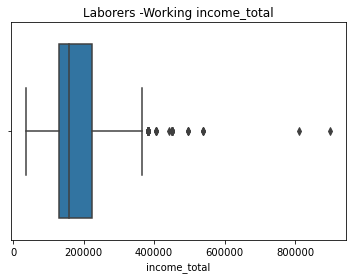

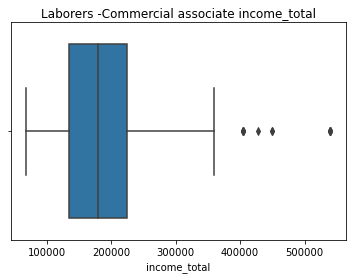

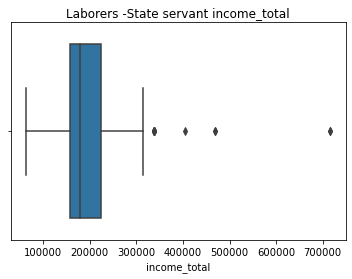

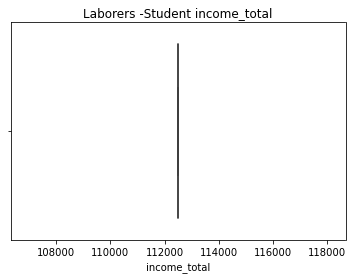

In [335]:
###하나의 직업에 관해서 5개의 income_type별로 income_total에 차이가 있는지 확인하기 위해서다.
###그냥 단순히 노동자중에서 아웃라이어를 짤라버린다면, 연금수령자측에 속하면서 직업을 가지는 사람들은
###돈을 많이 벌기 때문에, 아마도 연금수령자측에 속하는 사람들이 다 사라지게 될 것이다.
inc_ty1 =train['income_type'] == "Pensioner"
inc_ty2 =train['income_type'] == "Working"
inc_ty3 =train['income_type'] == "Commercial associate"
inc_ty4 =train['income_type'] == "State servant"
inc_ty5 =train['income_type'] == "Student"
inc_queue=[inc_ty1,inc_ty2,inc_ty3,inc_ty4,inc_ty5]
occ_ty= train['occyp_type'] =="Laborers"
fig, (ax1) = plt.subplots(1, 1)  
sns.histplot(data=train,x='income_total', hue='income_type',fill=False, element='step')
ax1.set_title("income_total compared to income_type")
fig, (ax1) = plt.subplots(1, 1)  
sns.boxplot(data=train[occ_ty],x='income_total', hue='income_type',orient='v')
ax1.set_title("Laborers - income_total")
for i in range(len(inc_queue)):
    fig, (ax1) = plt.subplots(1, 1)  
    sns.boxplot(data=train[inc_queue[i]&occ_ty],x='income_total', hue='income_type',orient='v')
    ax1.set_title("Laborers -{0} income_total".format(income_type_list[i]))

<strong>income_type</strong>이 <strong>Pensioner</strong>인 경우, <strong>occyp_type</strong>에서 <strong>Pensioner</strong>인 직업외의 직업을 가질 경우, 금액이 다른 직업군과 비교하여,<br/>
무조건 평균 금액이 높은 이유는 연금 수령자이면서, 별도로 다른 직업을 하고 있기 때문이다.<br/>
그외, 다른 <strong>income_type</strong>별 해당 직업에 관한 평균 금액이 다 다르다는 것을 알 수 있다.<br/>

In [336]:
#income_type이 Pensioner이면서 직업을 가지고 있는 사람들도 있다.
#그사람들의 값도 전부 다 Pensioner로 바뀌었는지 체크해보자.
train[train['income_type'] == 'Pensioner']['occyp_type'].value_counts()

Pensioner         4440
Laborers             3
Core staff           2
Medicine staff       1
Drivers              1
Accountants          1
Managers             1
Name: occyp_type, dtype: int64

# <center>DAYS_EMPLOYED 컬럼으로부터 새로운 컬럼 만들어 내기</center>

<strong>DAYS_EMPLOYED</strong>컬럼은 카드 발급일을 기준으로 언제부터 일을 하였나를 쓴것이다. 하지만, 해당 직업에 대한 근무 일수는 아니다. <br/>
<strong>DAYS_EMPLOYED</strong>컬럼을 <strong>년</strong>으로 만들어 주고자 한다. <br/>
<strong>-</strong>으로 이루어진<strong>DAYS_EMPLOYED</strong>컬럼에 양수인<strong>365243</strong>도 있으니, <strong>abs()함수</strong>를 통해 절대값으로 바꿔주고자 한다.<br/>


In [337]:
#자 이제 DAYS_EMPLOYED 행에 있는 근무 일자를 보자.
#근무 일자에서, 365243은 Pensioner이면서, 그뒤로 일을 하지 않은 사람들의 경우다.
#365243을 먼저 바꾸어 주어야 할 것 같다.아니면 다같이 바꾸어 주거나 .
#train['EM_YEAR_ALL'] = ((-train['DAYS_EMPLOYED'])//365) +(round(((-train['DAYS_EMPLOYED'])%365)/36.5,0)/10)
train['EM_YEAR']= abs(train['DAYS_EMPLOYED'])//365

# <center>DAYS_BIRTH 컬럼으로부터 새로운 컬럼 만들어 내기</center>

<strong>DAYS_BIRTH</strong> 컬럼에서부터 <strong>age</strong>컬럼을 만들고자 한다. 음수인 값을 <strong>abs()함수</strong>을 통해
절대 값으로 바꾸어주고,<br/>
<strong>365</strong>를 나눈 몫의 값만 가지게 만든다. <br/>
<strong>begin_month</strong> 또한 음수값을 가지므로, <strong>abs()함수를 통해</strong> 양수로 바꾸어 주었다. <br/>

In [338]:
#이제 DAYS_BIRTH를  YEAR BIRTH로 바꾸어주겠다.
train['age'] = abs(train['DAYS_BIRTH'])//365
train['begin_month'] = abs(train['begin_month'])

<strong>family_size</strong>의 경우 자체의 <strong>outlier</strong>결과, 2이상의 값은 모두 outlier로 보기 때문에,
임의로 family_size가 8명 이상인 가족들을 아웃 라이어로 보기로 하였다. <br/>

count    26457.000000
mean         2.196848
std          0.916717
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: family_size, dtype: float64


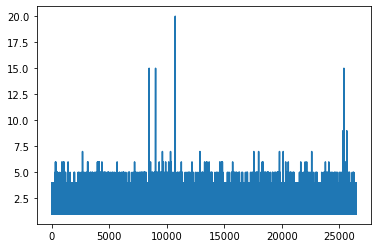

In [339]:
train['family_size'].plot()
print(train['family_size'].describe())

In [340]:
train = train[(train['family_size'] <= 7)]
train = train.reset_index(drop=True)

# ID를 만들어서 중복된 값이 있나 체크하기

<strong>ID</strong>를 통하여, 중복된 값이 있나 체크하여 보겠다. 한 사람이 신용카드를 여러개 만들 수도 있을 것이며,<br/>
한 사람이 신용카드를 5개를 만든다면, 한사람에 대한 중복된 값 4개가 존재하게 될것이다. <br/>
이에 따라, train 데이터프레임에서 아이숫자, 소득, BIRTH,DAY_EMPLOYED, work_phone, phone,email, family_Size, gender, car,reality,<br/>
income_type,reality, income_type,edu_type,family_type, house_type,occyp_type 컬럼이 전부다 겹치는 다른 인물은 없을것이라고 가정하자.<br/>
만약 겹친다면, 그사람은 아마 동인인물일 것이다. 이렇게 하여 <strong>ID</strong>를 만들어, 중복된 컬럼들을 제거할 것이다.<br/>

In [341]:
### 아이디 컬럼 만들기
train['ID'] = \
    train['child_num'].astype(str) + '_' + train['income_total'].astype(str) + '_' +\
    train['DAYS_BIRTH'].astype(str) + '_' + train['DAYS_EMPLOYED'].astype(str) + '_' +\
    train['work_phone'].astype(str) + '_' + train['phone'].astype(str) + '_' +\
    train['email'].astype(str) + '_' + train['family_size'].astype(str) + '_' +\
    train['gender'].astype(str) + '_' + train['car'].astype(str) + '_' +\
    train['reality'].astype(str) + '_' + train['income_type'].astype(str) + '_' +\
    train['edu_type'].astype(str) + '_' + train['family_type'].astype(str) + '_' +\
    train['house_type'].astype(str) + '_' + train['occyp_type'].astype(str)

<strong>ID</strong>를 만들어서, 중복된 값을 체크한 결과 <strong>17695개</strong>가 중복된 값을 가진다. <br/>
따라서, 중복된 값은 동인인물이므로, 중복된 값을 제외한 컬럼들만 가지고 분석하기 위하여 중복된 값들을 제거 할것이다.<br/>

In [342]:
train['ID'].duplicated().value_counts()

True     17695
False     8756
Name: ID, dtype: int64

In [343]:
train.drop_duplicates(['ID'],inplace=True)

이제 중복된 값을 제외하고, 총 <strong>8756</strong>개의 컬럼이 남았다.<br/>

In [344]:
train['ID'].duplicated().value_counts()

False    8756
Name: ID, dtype: int64

# <center>쓸모없는 컬럼 삭제하기</center>

이제 쓸모없는 컬럼을 삭제하고자 한다. <strong>index</strong>는 필요없고, <strong>FLAG_MOBIL</strong>컬럼은 모두 동일한 값인
<strong>1</strong>을 가진다. <br/>
<strong>DAYS_BIRTH</strong>를 통하여 AGE라는 컬럼을 만들어 냈으니, 쓸모가 없다.또, <strong>DAYS_EMPLOYED</strong>를 통해,
총 근무 년수를 뽑아 냈으니 쓸모가 없다 .<br/>
<strong>ID</strong>컬럼을 통해 중복된 값을 제외했으니 이제 <strong>ID</strong>는 <strong>index</strong>와 같은 개념이므로 제거를 하겠다.

In [345]:
train.drop(['index', 'FLAG_MOBIL','DAYS_BIRTH','DAYS_EMPLOYED','ID'], axis=1, inplace=True)

제거가 완료된 후, <strong>train</strong>데이터 프레임의 컬럼은 총 <strong>gender,car, reality, child_num,income_total,income_type,
    edu_type,family_type,house_type</strong> <br/>
    <strong>work_phone,phone,email,occyp_type,family_size,begin_month,credit,EM_YEAR,age</strong>가 남게된다.

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8756 entries, 0 to 26450
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        8756 non-null   object 
 1   car           8756 non-null   object 
 2   reality       8756 non-null   object 
 3   child_num     8756 non-null   int64  
 4   income_total  8756 non-null   float64
 5   income_type   8756 non-null   object 
 6   edu_type      8756 non-null   object 
 7   family_type   8756 non-null   object 
 8   house_type    8756 non-null   object 
 9   work_phone    8756 non-null   int64  
 10  phone         8756 non-null   int64  
 11  email         8756 non-null   int64  
 12  occyp_type    7585 non-null   object 
 13  family_size   8756 non-null   float64
 14  begin_month   8756 non-null   float64
 15  credit        8756 non-null   float64
 16  EM_YEAR       8756 non-null   int64  
 17  age           8756 non-null   int64  
dtypes: float64(4), int64(6), ob

# <center>NULL값 있는 row 삭제하기</center>

이제 NULL 값이 있는 row를 삭제하기 위하여 dropna를 통하여 NULL값이 있는 row를 삭제하겠다.

In [347]:
train.dropna(axis=0 , inplace=True)

In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7585 entries, 1 to 26450
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        7585 non-null   object 
 1   car           7585 non-null   object 
 2   reality       7585 non-null   object 
 3   child_num     7585 non-null   int64  
 4   income_total  7585 non-null   float64
 5   income_type   7585 non-null   object 
 6   edu_type      7585 non-null   object 
 7   family_type   7585 non-null   object 
 8   house_type    7585 non-null   object 
 9   work_phone    7585 non-null   int64  
 10  phone         7585 non-null   int64  
 11  email         7585 non-null   int64  
 12  occyp_type    7585 non-null   object 
 13  family_size   7585 non-null   float64
 14  begin_month   7585 non-null   float64
 15  credit        7585 non-null   float64
 16  EM_YEAR       7585 non-null   int64  
 17  age           7585 non-null   int64  
dtypes: float64(4), int64(6), ob

NULL값을 제거하고 7585개의 row가 남게된다. 이제 이 7585개의 row를 통하여 credit을 예측하고자 한다.

# <center>income_total 컬럼 값 변경하기</center>

<strong>income_total</strong>값이 너무 높기 때문에, 수치로 알기 쉽게 변환하겠다.<br/>

In [349]:
train['income_total'] = round(train['income_total']/1000,0)

count    7585.000000
mean      181.282795
std       100.537720
min        27.000000
25%       112.000000
50%       158.000000
75%       225.000000
max      1575.000000
Name: income_total, dtype: float64


<AxesSubplot:>

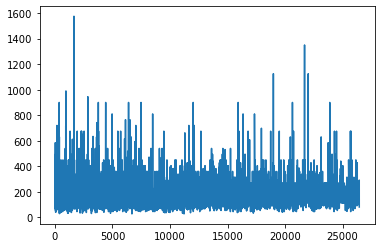

In [350]:
print(train['income_total'].describe())
train['income_total'].plot()

# <center>income_total 수치 80단계로 나누기</center>

income_total경우에 가격이 제각각이다. 소득의 분포를 만들기 위해서, 80단계로 만들어 주겠다.

In [351]:
bins = list(range(0,1581, 20))

In [352]:
bins_labels = [ str(x)+"대" for x in bins[1:]]

In [353]:
train['income_label'] = pd.cut(train['income_total'], bins, right=False, labels=bins_labels[:])

In [354]:
print(train['income_label'].value_counts())
print(train['income_label'].unique()) # 80개로 나누었지만, 중간에 값이 없는 부분도 있어 46개로 나뉘어진다.

140대    1139
120대     860
160대     844
200대     766
100대     694
        ... 
980대       0
940대       0
900대       0
880대       0
20대        0
Name: income_label, Length: 79, dtype: int64
['260대', '460대', '220대', '160대', '280대', ..., '780대', '540대', '700대', '1140대', '1360대']
Length: 46
Categories (79, object): ['20대' < '40대' < '60대' < '80대' ... '1520대' < '1540대' < '1560대' < '1580대']


# <center>컬럼 데이터 숫자로 바꿔주기</center>
<strong> F,M</strong>같은 string 데이터를 모두 숫자로 바꿔주겠다. <br/>


In [356]:
label_value=list(range(79))

In [357]:
train['gender'].replace(['F', 'M'], [0, 1], inplace=True)
train['car'].replace(['N', 'Y'], [0, 1], inplace=True)
train['reality'].replace(['N', 'Y'], [0, 1], inplace=True)
train['income_type'].replace(['Commercial associate', 'Working','Pensioner','State servant','Student'],[0,1,2,3,4],inplace=True)
train['edu_type'].replace(['Academic degree', 'Higher education','Incomplete higher','Lower secondary','Secondary / secondary special'],[0,1,2,3,4],inplace=True)
train['family_type'].replace(['Civil marriage', 'Married','Separated','Single / not married','Widow'],[0,1,2,3,4],inplace=True)
train['house_type'].replace(['Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment','With parents'],[0,1,2,3,4,5],inplace=True)
train['occyp_type'].replace(['Accountants', 'Cleaning staff','Cooking staff','Core staff','Drivers','High skill tech staff',
                            'HR staff','IT staff','Laborers','Low-skill Laborers', 'Managers','Medicine staff',
                            'Pensioner','Private service staff', 'Realty agents','Sales staff','Secretaries',
                            'Security staff','Waiters/barmen staff'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],inplace=True)
train['income_label'].replace(bins_labels,label_value,inplace=True)

<strong>income_total</strong>은 <strong>income_label</strong>로 분류하여 46단계로 나누어 주었으니 이제, 사용하지 않을 것이기 때문에 해당 컬럼을 제거한다.

In [358]:
train.drop(['income_total'], axis=1, inplace=True)

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7585 entries, 1 to 26450
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gender        7585 non-null   int64
 1   car           7585 non-null   int64
 2   reality       7585 non-null   int64
 3   child_num     7585 non-null   int64
 4   income_type   7585 non-null   int64
 5   edu_type      7585 non-null   int64
 6   family_type   7585 non-null   int64
 7   house_type    7585 non-null   int64
 8   work_phone    7585 non-null   int64
 9   phone         7585 non-null   int64
 10  email         7585 non-null   int64
 11  occyp_type    7585 non-null   int64
 12  family_size   7585 non-null   int32
 13  begin_month   7585 non-null   int32
 14  credit        7585 non-null   int32
 15  EM_YEAR       7585 non-null   int64
 16  age           7585 non-null   int64
 17  income_label  7585 non-null   int32
dtypes: int32(4), int64(14)
memory usage: 1007.4 KB


# <center>결과를 도출하는데 필요한 컬럼과, 결과를 도출해야내는 컬럼 정하기</center>

<strong>credit</strong>을 도출해내야하므로, <strong>credit</strong>을 제외한 다른 컬럼을 일단, 도출하는데 필요한 컬럼으로 보자.

In [382]:
#X = train[['gender', 'car','income_total','family_size','begin_month','EM_YEAR','age','reality','occyp_type','house_type','child_num']]
X = train.drop('credit', axis=1)
y = train['credit']

17개의 컬럼을 가지고 1개의 컬럼을 도출하여 보자.

In [361]:
print('x_train shape:', X.shape)
print('x_test shape:', y.shape)

x_train shape: (7585, 17)
x_test shape: (7585,)


In [362]:
train = train.astype({'credit':'int'})
train = train.astype({'family_size':'int'})
train = train.astype({'begin_month':'int'})
train = train.astype({'income_label':'int'})

In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7585 entries, 1 to 26450
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gender        7585 non-null   int64
 1   car           7585 non-null   int64
 2   reality       7585 non-null   int64
 3   child_num     7585 non-null   int64
 4   income_type   7585 non-null   int64
 5   edu_type      7585 non-null   int64
 6   family_type   7585 non-null   int64
 7   house_type    7585 non-null   int64
 8   work_phone    7585 non-null   int64
 9   phone         7585 non-null   int64
 10  email         7585 non-null   int64
 11  occyp_type    7585 non-null   int64
 12  family_size   7585 non-null   int32
 13  begin_month   7585 non-null   int32
 14  credit        7585 non-null   int32
 15  EM_YEAR       7585 non-null   int64
 16  age           7585 non-null   int64
 17  income_label  7585 non-null   int32
dtypes: int32(4), int64(14)
memory usage: 1007.4 KB


(X와 y)를 훈련용 데이터로 0.8을 두고, 테스트용 데이터를 0.2로 두겠다.

In [378]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

# 회귀분석을 통한 선형모델 값 확인하기

In [383]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
print(model.score(train_X, train_y))

0.6587013843111404


# 다중클래스 분류 (K-NN 모델)

In [380]:
from random import *   
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
check = 0
while check !=1 :
    item_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17]
    a = randint(1, 17)
    print(a)
    sampleList = random.sample(item_list, a)
    print(sampleList)
    data = train.values[:,sampleList]
    label = train.values[:,14]
    target_names = np.array([0,1,2])
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("테스트 세트에 대한 예측값:\n {}".format(y_pred))
    print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))
    if(np.mean(y_pred == y_test) >= 0.65):
        check = 1

4
[5, 7, 16, 12]
테스트 세트에 대한 예측값:
 [2. 2. 2. ... 2. 2. 2.]
테스트 세트의 정확도: 0.55
9
[1, 13, 7, 8, 9, 16, 4, 11, 15]
테스트 세트에 대한 예측값:
 [2. 1. 0. ... 2. 2. 2.]
테스트 세트의 정확도: 0.55
8
[16, 8, 3, 17, 0, 6, 7, 1]
테스트 세트에 대한 예측값:
 [2. 2. 1. ... 2. 1. 1.]
테스트 세트의 정확도: 0.54
8
[15, 3, 2, 11, 0, 1, 9, 4]
테스트 세트에 대한 예측값:
 [2. 2. 0. ... 2. 2. 2.]
테스트 세트의 정확도: 0.55
3
[11, 5, 3]
테스트 세트에 대한 예측값:
 [0. 2. 0. ... 2. 2. 2.]
테스트 세트의 정확도: 0.54
11
[11, 7, 15, 3, 6, 2, 9, 4, 17, 5, 13]
테스트 세트에 대한 예측값:
 [0. 2. 0. ... 2. 1. 2.]
테스트 세트의 정확도: 0.54
3
[6, 12, 8]
테스트 세트에 대한 예측값:
 [2. 2. 2. ... 2. 0. 2.]
테스트 세트의 정확도: 0.54
8
[13, 4, 7, 17, 1, 8, 6, 0]
테스트 세트에 대한 예측값:
 [2. 2. 1. ... 2. 2. 2.]
테스트 세트의 정확도: 0.55
8
[5, 11, 7, 15, 6, 2, 1, 17]
테스트 세트에 대한 예측값:
 [2. 1. 2. ... 2. 2. 2.]
테스트 세트의 정확도: 0.54
8
[2, 12, 4, 1, 5, 3, 8, 9]
테스트 세트에 대한 예측값:
 [1. 2. 1. ... 2. 2. 2.]
테스트 세트의 정확도: 0.55
10
[4, 7, 12, 9, 16, 3, 8, 13, 5, 2]
테스트 세트에 대한 예측값:
 [2. 2. 2. ... 2. 2. 2.]
테스트 세트의 정확도: 0.52
9
[13, 4, 2, 17, 0, 9, 7, 16, 11]
테스트 세트에 대한 예측값:
 

KeyboardInterrupt: 